A numerical simulation of non-linear data using a neural network with 4 layers to perform regression.

1) Data creation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Example dataset
X = np.array([[1, 2],
              [3, 4],
              [5, 6]])

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

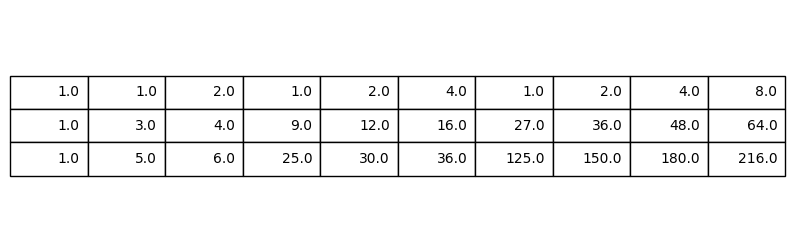

In [2]:
# Plot as table
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('off')  # Hide axis
table = ax.table(
    cellText=np.round(X_poly, 3),  # Rounded for readability
    loc='center',
)
table.scale(1, 2)  # Makes the table larger and easier to read
plt.show()


2) target value

In [3]:
y = np.array([10, 20, 35], dtype=float)

3) Train-test split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.33, random_state=42)

4) Build A 4-Layer regression model

In [5]:
from tensorflow import keras
from keras.layers import Dense
model = keras.Sequential([
    Dense(32, activation='relu', input_dim=X_poly.shape[1]),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5) COMPILE MODEL

In [6]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

6) TRAIN MODEL

In [7]:
history = model.fit(X_train, y_train, epochs=500, verbose=0)

7) Result

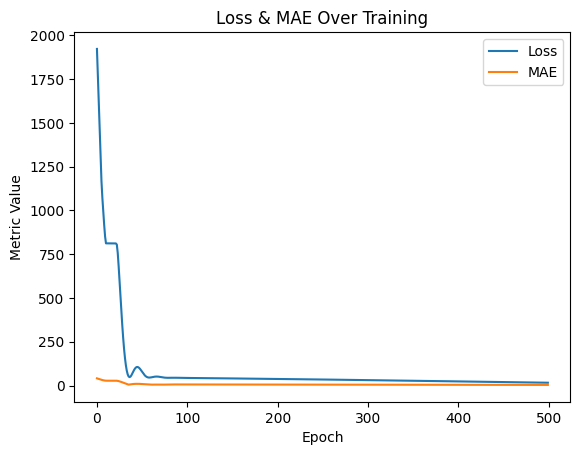

In [8]:
plt.plot(history.history['loss'], label="Loss")
plt.plot(history.history['mae'], label="MAE")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.title("Loss & MAE Over Training")
plt.legend()
plt.show()